AndrewNg 机器学习 week3 作业

逻辑回归 正则化处理

In [420]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [421]:
data = pd.read_csv('ex2data2.txt',header = None,names = ['test1','test2','accepted'])
data.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


原始散点图

Text(0, 0.5, 'test2 score')

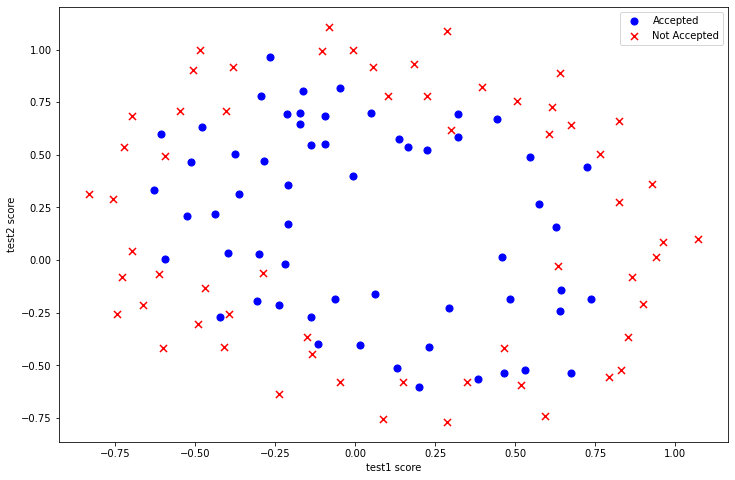

In [422]:
positive = data[data.accepted==1]
negative = data[data.accepted==0]

plt.subplots(figsize = (12,8))
plt.scatter(positive['test1'],positive['test2'],s = 50,color = 'blue',marker = 'o',label = 'Accepted')
plt.scatter(negative['test1'],negative['test2'],s = 50,color = 'red',marker = 'x',label = 'Not Accepted')
plt.legend()
plt.xlabel('test1 score')
plt.ylabel('test2 score')


创建一组多项式特征

In [423]:
x1 = data['test1']
x2 = data['test2']

data.insert(3,'ones',1)

for i in range(1,5):
    for j in range(0,i+1):
        data['F'+str(i)+str(j)] = np.power(x1,i-j)*np.power(x2,j)

data.drop('test1',axis = 1,inplace=True)
data.drop('test2',axis = 1,inplace=True)

data.head()

,accepted,ones,F10,F11,F20,F21,F22,F30,F31,F32,F33,F40,F41,F42,F43,F44
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,0.000007,0.000094,0.001286,0.017551,0.239497
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,0.000074,-0.000546,0.004035,-0.029801,0.220095
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,0.002086,-0.006757,0.021886,-0.070895,0.229642
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,0.019775,-0.026483,0.035465,-0.047494,0.063602
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,0.069393,-0.062956,0.057116,-0.051818,0.047011


方法一:梯度下降法

In [424]:
##定义sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [425]:
#定义cost function代价函数
def computecost(theta,X,y,lamda):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second = np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    reg = (lamda/(2*len(y)))*np.sum(np.power(theta[:,1:theta.shape[1]],2))
    return (1/len(y))*np.sum(first-second) + reg

In [426]:
X = data[['ones','F10','F11','F20','F21','F22','F30','F31','F32','F33','F40','F41','F42','F43','F44']]
y = data[['accepted']]

In [427]:
#梯度下降
def gradientDescent(theta,X,y,lamda):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    m = len(y)
    iter = 1000
    alpha = 1
    cost = np.zeros(iter)
    temp = np.matrix(np.zeros(theta.shape))

    for i in range(iter):
        y_predicted = sigmoid(X*theta.T)
        temp[0,0] = theta[0,0]-alpha*(1/m)*sum(y_predicted-y)
        for j in range(1,15):
            temp[0,j] = theta[0,j]*(1-alpha*lamda/m)-alpha*(1/m)*sum(np.multiply(X[:,j],(y_predicted-y)))
        theta = temp
        cost[i] = computecost(theta,X,y,lamda)
        #print(f"cost is:{cost[i]}")
    return theta,cost

In [428]:
theta = np.zeros(15)
X = np.array(X.values)
y = np.array(y.values)
lamda = 1
theta,cost = gradientDescent(theta,X,y,lamda)

In [429]:
theta1 = theta
theta1

matrix([[ 1.28774208,  0.56744213,  1.1184087 , -2.20671391, -0.92834607,
         -1.62520867, -0.03661411, -0.36907088, -0.33634424, -0.47661336,
         -1.67874467, -0.0598562 , -0.62664523, -0.26314793, -1.5485206 ]])

In [430]:
cost

array([0.68487984, 0.6781818 , 0.672369  , 0.66711851, 0.66227022,
       0.65773829, 0.6534718 , 0.64943702, 0.6456093 , 0.64196931,
       0.63850107, 0.63519106, 0.63202755, 0.62900027, 0.62610017,
       0.62331917, 0.62065006, 0.61808634, 0.61562215, 0.61325215,
       0.61097148, 0.60877566, 0.6066606 , 0.6046225 , 0.60265784,
       0.60076333, 0.59893593, 0.59717277, 0.59547115, 0.59382855,
       0.59224258, 0.59071097, 0.5892316 , 0.58780242, 0.58642152,
       0.58508706, 0.58379729, 0.58255054, 0.58134522, 0.58017981,
       0.57905286, 0.57796296, 0.5769088 , 0.57588908, 0.57490259,
       0.57394814, 0.57302461, 0.57213091, 0.571266  , 0.57042888,
       0.56961859, 0.56883421, 0.56807483, 0.56733961, 0.56662773,
       0.56593838, 0.5652708 , 0.56462427, 0.56399807, 0.56339151,
       0.56280395, 0.56223474, 0.56168328, 0.56114897, 0.56063126,
       0.56012959, 0.55964343, 0.55917228, 0.55871564, 0.55827305,
       0.55784403, 0.55742816, 0.55702501, 0.55663416, 0.55625

画出代价函数变化曲线

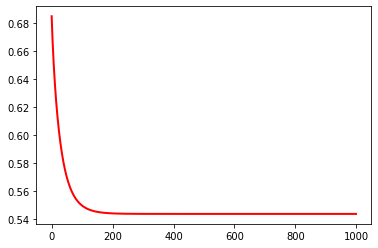

In [446]:
plt.plot(cost,'r',linewidth=2)

画出决策边界

In [431]:
#定义计算 theta*X.T 函数
def hfunc(theta,x,y):
    X = np.array([1,x,y,x**2,x*y,y**2,x**3,(x**2)*y,x*(y**2),y**3,x**4,(x**3)*y,(x**2)*(y**2),x*(y**3),y**4])
    X = np.matrix(X)
    temp = theta*X.T       

    return temp

In [432]:
t1 = np.linspace(-1, 1.5, 1000)
t2 = np.linspace(-1, 1.5, 1000)
xx = []
yy = []
for i in range(1000):
    for j in range(1000):
        if np.abs(hfunc(theta1,t1[i],t2[j]))<0.001:
            xx.append(t1[i])
            yy.append(t2[j])
xx


[-0.6496496496496497,
 -0.6496496496496497,
 -0.6496496496496497,
 -0.6496496496496497,
 -0.6496496496496497,
 -0.6471471471471472,
 -0.6471471471471472,
 -0.6471471471471472,
 -0.6471471471471472,
 -0.6446446446446447,
 -0.6446446446446447,
 -0.6446446446446447,
 -0.6421421421421422,
 -0.6421421421421422,
 -0.6396396396396397,
 -0.6371371371371372,
 -0.6371371371371372,
 -0.6346346346346347,
 -0.6296296296296297,
 -0.6271271271271271,
 -0.6221221221221221,
 -0.6196196196196196,
 -0.6171171171171171,
 -0.6171171171171171,
 -0.6146146146146146,
 -0.6121121121121121,
 -0.6096096096096096,
 -0.6071071071071071,
 -0.6046046046046046,
 -0.6046046046046046,
 -0.6021021021021021,
 -0.5995995995995996,
 -0.597097097097097,
 -0.597097097097097,
 -0.5945945945945945,
 -0.5945945945945945,
 -0.592092092092092,
 -0.592092092092092,
 -0.5895895895895895,
 -0.587087087087087,
 -0.5845845845845845,
 -0.5845845845845845,
 -0.577077077077077,
 -0.577077077077077,
 -0.572072072072072,
 -0.56956956956956

Text(0, 0.5, 'test2 score')

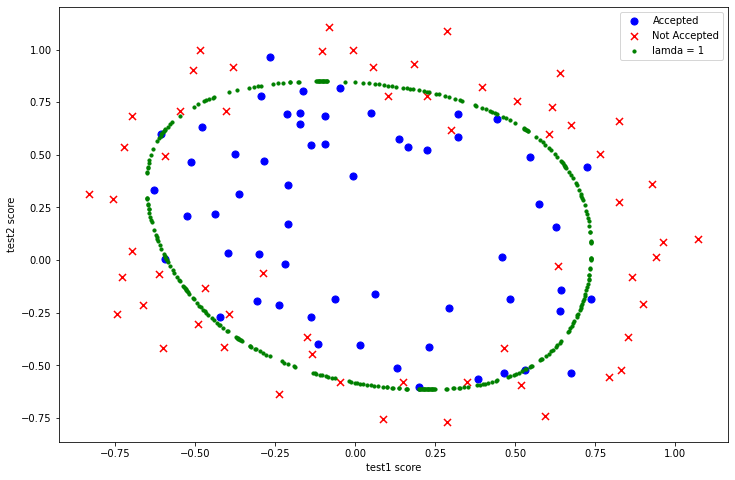

In [433]:
plt.subplots(figsize = (12,8))
plt.scatter(positive['test1'],positive['test2'],s = 50,color = 'blue',marker = 'o',label = 'Accepted')
plt.scatter(negative['test1'],negative['test2'],s = 50,color = 'red',marker = 'x',label = 'Not Accepted')
plt.scatter(xx,yy,s = 10,color = 'green',label = 'lamda = 1')
plt.legend()
plt.xlabel('test1 score')
plt.ylabel('test2 score')


画出lamda = 100的决策边界

Text(0, 0.5, 'test2 score')

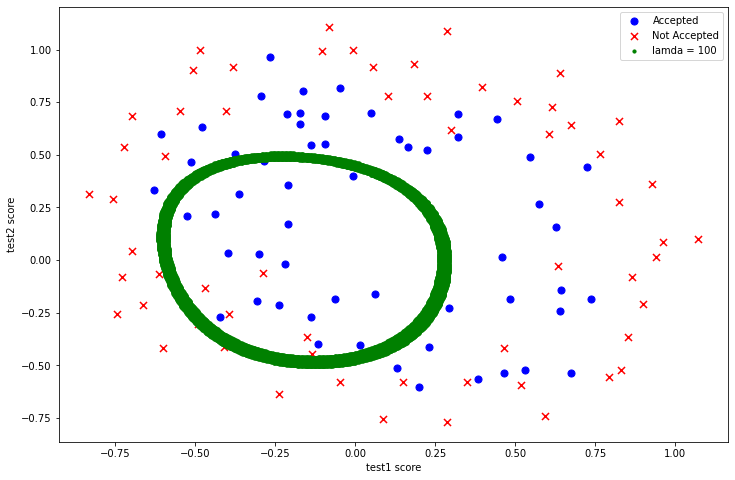

In [434]:
lamda = 100
theta2,cost2 = gradientDescent(theta,X,y,lamda)

xx2 = []
yy2 = []
for i in range(1000):
    for j in range(1000):
        if np.abs(hfunc(theta2,t1[i],t2[j]))<0.001:
            xx2.append(t1[i])
            yy2.append(t2[j])

plt.subplots(figsize = (12,8))
plt.scatter(positive['test1'],positive['test2'],s = 50,color = 'blue',marker = 'o',label = 'Accepted')
plt.scatter(negative['test1'],negative['test2'],s = 50,color = 'red',marker = 'x',label = 'Not Accepted')
plt.scatter(xx2,yy2,s = 10,color = 'green',label = 'lamda = 100')
plt.legend()
plt.xlabel('test1 score')
plt.ylabel('test2 score')


画出lamda = 0的决策边界

Text(0, 0.5, 'test2 score')

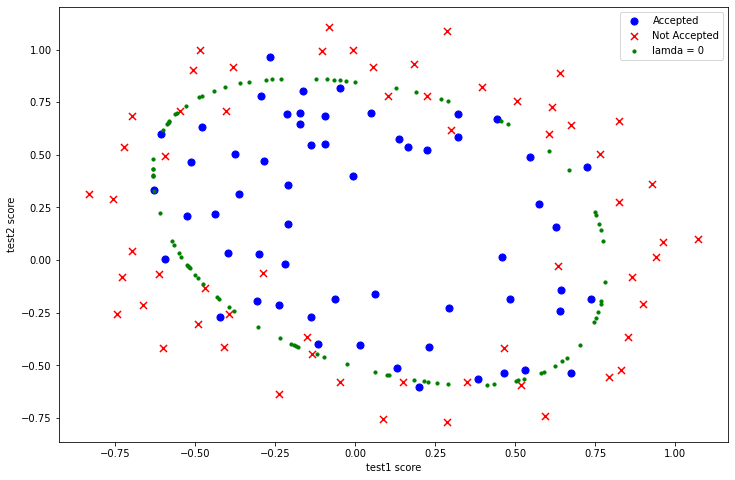

In [435]:
lamda = 0
theta3,cost3 = gradientDescent(theta,X,y,lamda)

xx3 = []
yy3 = []
for i in range(1000):
    for j in range(1000):
        if np.abs(hfunc(theta3,t1[i],t2[j]))<0.001:
            xx3.append(t1[i])
            yy3.append(t2[j])

plt.subplots(figsize = (12,8))
plt.scatter(positive['test1'],positive['test2'],s = 50,color = 'blue',marker = 'o',label = 'Accepted')
plt.scatter(negative['test1'],negative['test2'],s = 50,color = 'red',marker = 'x',label = 'Not Accepted')
plt.scatter(xx3,yy3,s = 10,color = 'green',label = 'lamda = 0')
plt.legend()
plt.xlabel('test1 score')
plt.ylabel('test2 score')

方法二：sklearn

In [440]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_sklearn = data[['F10','F11','F20','F21','F22','F30','F31','F32','F33','F40','F41','F42','F43','F44']]
y_sklearn = data[['accepted']]
X_train,X_test,y_train,y_test = train_test_split(X_sklearn,y_sklearn,test_size = 0.2,random_state = 10)

model = linear_model.LogisticRegression()
model.fit(X_train,y_train)

model.predict(X_test)
model.score(X_test,y_test)

D:\python\anzhuang\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8333333333333334

In [441]:
model.coef_

array([[ 0.23787805,  0.70642226, -1.90417526, -0.59927108, -1.32345341,
        -0.00284118, -0.34840707, -0.35756701, -0.4297544 , -1.36797538,
         0.03979774, -0.61229304, -0.1589216 , -1.23782374]])

In [442]:
model.intercept_

array([1.02425543])

画出sklearn的决策边界

In [444]:
theta4 = []
theta4.append(model.intercept_[0])
for i in range(14):
    coef = model.coef_[:,i][0]
    theta4.append(coef)
theta4

[1.0242554329967297,
 0.23787804929839632,
 0.7064222613586209,
 -1.904175259052714,
 -0.5992710825232352,
 -1.3234534078978324,
 -0.002841176986405045,
 -0.3484070659665357,
 -0.35756701406084934,
 -0.4297544006404418,
 -1.3679753839918225,
 0.039797736246522275,
 -0.6122930381666329,
 -0.1589215998060587,
 -1.237823738217939]

Text(0, 0.5, 'test2 score')

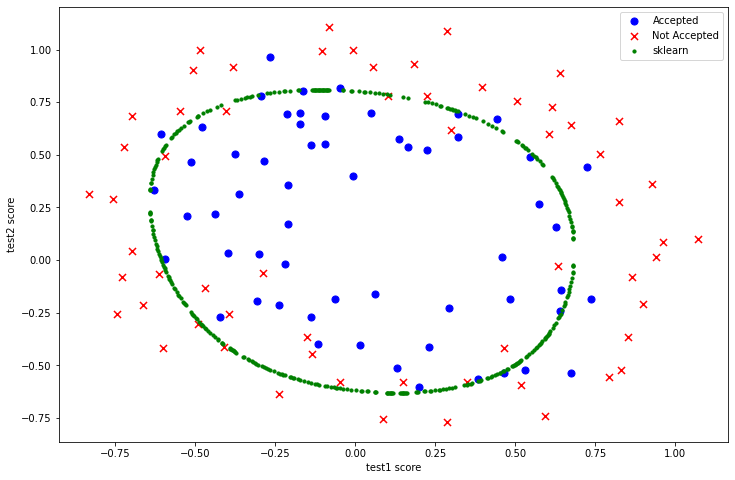

In [445]:
xx4 = []
yy4 = []
theta4 = np.matrix(theta4)
for i in range(1000):
    for j in range(1000):
        if np.abs(hfunc(theta4,t1[i],t2[j]))<0.001:
            xx4.append(t1[i])
            yy4.append(t2[j])

plt.subplots(figsize = (12,8))
plt.scatter(positive['test1'],positive['test2'],s = 50,color = 'blue',marker = 'o',label = 'Accepted')
plt.scatter(negative['test1'],negative['test2'],s = 50,color = 'red',marker = 'x',label = 'Not Accepted')
plt.scatter(xx4,yy4,s = 10,color = 'green',label = 'sklearn')
plt.legend()
plt.xlabel('test1 score')
plt.ylabel('test2 score')